In [64]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.2'

from algorithms.utils import restore_state_multi_agent_only_batteries
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [65]:
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/server_07-08/20250508_061725_pol_net_type_actor_critic_lr_pol_1e-05_lr_inc_0.0004_tot_timesteps_17520000_lr_sched_cosine_multiagent'

networks_batteries, network_rec, config, world_metadata, train_info, val_info = restore_state_multi_agent_only_batteries(directory)

{'ACTIVATION': 'tanh', 'ACTIVATION_INCENTIVE': 'tanh', 'ALPHA': 0.0, 'BATTERY_ACTION_SPACE_SIZE': 1, 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True, 'cos_day_of_year': False, 'cos_seconds_of_day': False, 'demand': True, 'generation': True, 'network_REC_minus': True, 'network_REC_plus': True, 'selling_price': True, 'sin_day_of_year': False, 'sin_seconds_of_day': False, 'soc': False, 'temperature': True}, 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True, 'cos_day_of_year': False, 'cos_seconds_of_day': False, 'demand': True, 'generation': True, 'network_REC_minus': True, 'network_REC_plus': True, 'selling_price': True, 'sin_day_of_year': False, 'sin_seconds_of_day': False, 'soc': True, 'temperature': True}, 'BATTERY_OBS_KEYS': ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus'), 'BETA_ADAM_INCENTIVES': 0.7, 'BETA_ADAM_POLICY': 0.9, 'C

In [66]:
config

{'ACTIVATION': 'tanh',
 'ACTIVATION_INCENTIVE': 'tanh',
 'ALPHA': 0.0,
 'BATTERY_ACTION_SPACE_SIZE': 1,
 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': False,
  'temperature': True},
 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': True,
  'temperature': True},
 'BATTERY_OBS_KEYS': ('temperature',
  'soc',
  'demand',
  'generation',
  'buying_price',
  'selling_price',
  'sin_day_of_year',
  'cos_day_of_year',
  'sin_seconds_of_day',
  'cos_seconds_of_day',
  'network_REC_plus',
  'netwo

In [67]:
world_metadata

WorldMetadata(world_train={'num_battery_houses': 3, 'battery_observations': ['demand', 'generation', 'temperature', 'soc', 'day_of_year', 'seconds_of_day', 'selling_price', 'buying_price', 'network_REC_plus', 'network_REC_minus'], 'rec_observations': ['demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_base_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'day_of_year', 'seconds_of_day', 'network_REC_plus', 'network_REC_minus'], 'demand': {'path': 'ernestogym/ernesto_jax/data/demand/rse_profiles_train.csv', 'timestep': 3600, 'test_profiles': None, 'data_usage': 'end'}, 'generation': {'path': {'battery_houses_generation': ['ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_-60deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_0deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_

In [68]:
jax.tree.map(lambda x: jnp.isnan(x).any(axis=jnp.arange(1, x.ndim)), train_info)

{}

In [69]:
jax.tree.map(lambda x: x.shape, val_info)

{'actions': (171, 43350, 3),
 'balance_minus': (171, 43350),
 'balance_plus': (171, 43350),
 'buy_prices': (171, 43350, 3),
 'demands': (171, 43350, 3),
 'dones': {'__all__': (171, 43350),
  'battery_agent_0': (171, 43350),
  'battery_agent_1': (171, 43350),
  'battery_agent_2': (171, 43350)},
 'energy_to_batteries': (171, 43350, 3),
 'generations': (171, 43350, 3),
 'int_reward_mat': (171, 43350, 3, 3),
 'int_rewards': (171, 43350, 3),
 'norm_reward': {'r_clipping': (171, 43350, 3),
  'r_deg': (171, 43350, 3),
  'r_glob': (171, 43350, 3),
  'r_op': (171, 43350, 3),
  'r_trad': (171, 43350, 3)},
 'pure_reward': {'r_clipping': (171, 43350, 3),
  'r_deg': (171, 43350, 3),
  'r_glob': (171, 43350, 3),
  'r_op': (171, 43350, 3),
  'r_trad': (171, 43350, 3)},
 'r_tot': (171, 43350, 3),
 'self_consumption': (171, 43350),
 'sell_prices': (171, 43350, 3),
 'soc': (171, 43350, 3),
 'soh': (171, 43350, 3),
 'tot_incentives': (171, 43350),
 'weig_reward': {'r_clipping': (171, 43350, 3),
  'r_deg'

In [70]:
val_info['r_tot'].shape #.sum(axis=(1, 2)).shape

(171, 43350, 3)

In [71]:
val_info['int_reward_mat'][11].sum(axis=0)

array([[378.22165 ,  57.591774,  56.448296],
       [387.15637 ,  45.6966  ,  59.40517 ],
       [391.5722  ,  45.3641  ,  55.322884]], dtype=float32)

In [72]:
lim = config['NUM_RL_AGENTS'] if 'NUM_RL_AGENTS' in config.keys() else config['NUM_BATTERY_AGENTS']
a = val_info['r_tot'][..., :lim].sum(axis=(1, 2))
a

array([-3649.4485, -3144.7273, -2999.4849, -2800.8062, -2625.3176,
       -2428.5906, -2238.8013, -2125.499 , -2002.7158, -1927.3934,
       -1812.8748, -1743.0847, -1721.1788, -1678.7603, -1640.2461,
       -1630.7412, -1602.822 , -1571.1085, -1568.8204, -1546.1139,
       -1549.4891, -1533.0006, -1509.1631, -1502.537 , -1492.3939,
       -1484.3008, -1487.0385, -1479.2375, -1470.9105, -1466.1531,
       -1449.5968, -1432.8613, -1404.854 , -1396.2272, -1401.1523,
       -1395.8192, -1379.288 , -1411.6969, -1424.803 , -1408.9431,
       -1397.6522, -1383.7206, -1359.3986, -1362.6661, -1363.9729,
       -1387.3625, -1405.8679, -1435.1603, -1436.9282, -1454.0707,
       -1483.44  , -1495.6434, -1506.6233, -1514.6508, -1523.0231,
       -1536.2935, -1553.3031, -1556.7664, -1571.899 , -1584.2684,
       -1595.9109, -1607.0691, -1622.8927, -1643.137 , -1667.6624,
       -1682.7026, -1671.0907, -1700.903 , -1718.6124, -1700.5762,
       -1701.3406, -1721.2039, -1724.0907, -1720.4905, -1714.8

In [73]:
val_info['r_tot'].shape

(171, 43350, 3)

In [74]:
val_info['r_tot'][9, :].sum(axis=0)

array([-226.92267, -840.3416 , -860.1352 ], dtype=float32)

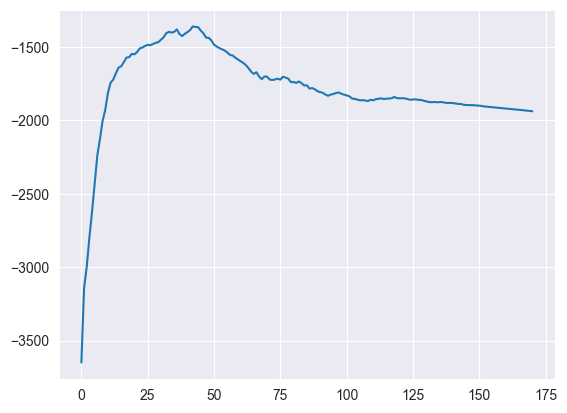

In [75]:
plt.plot(a)

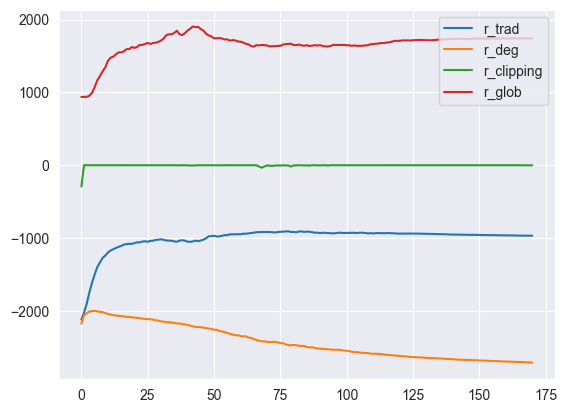

In [76]:
plt.plot(val_info['weig_reward']['r_trad'][..., :lim].sum(axis=(1, 2)), label='r_trad')
plt.plot(val_info['weig_reward']['r_deg'][..., :lim].sum(axis=(1, 2)), label='r_deg')
plt.plot(val_info['weig_reward']['r_clipping'][..., :lim].sum(axis=(1, 2)), label='r_clipping')
plt.plot(val_info['weig_reward']['r_glob'][..., :lim].sum(axis=(1, 2)), label='r_glob')
plt.legend()

In [77]:
val_info['weig_reward']['r_trad'].shape

(171, 43350, 3)

In [78]:
cmap = mpl.colormaps['plasma']
n_agents = config['NUM_BATTERY_AGENTS']
colors = cmap(np.linspace(0, 1, n_agents))

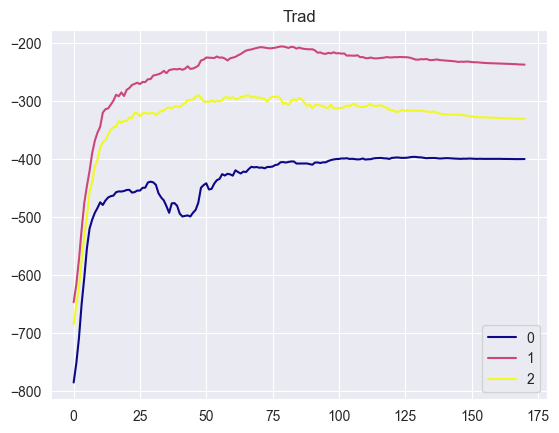

In [79]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_trad'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Trad')
    plt.legend()

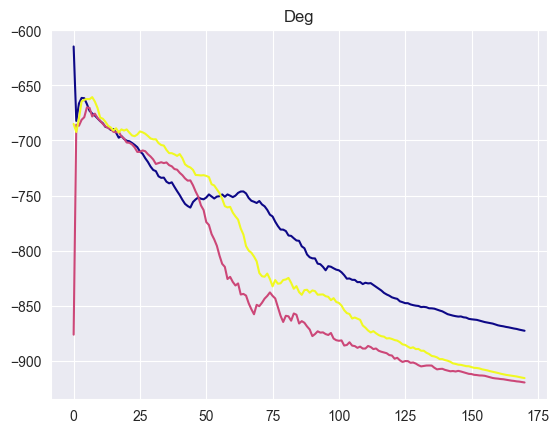

In [80]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_deg'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Deg')

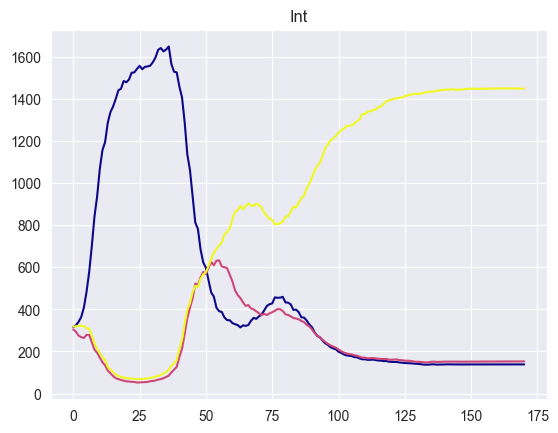

In [81]:
for i in range(n_agents):
    plt.plot(val_info['int_rewards'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Int')

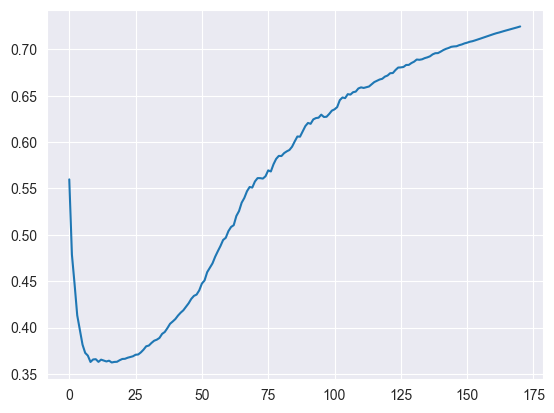

In [82]:
plt.plot(val_info['soc'][..., :lim].mean(axis=(1, 2)))

In [83]:
val_info['self_consumption'].sum(axis=1)

array([ 5059191.5,  5057092. ,  5061623. ,  5142921. ,  5357759. ,
        5783705. ,  6294480. ,  6616134.5,  6975094. ,  7270165.5,
        7754767. ,  8002144. ,  8084101.5,  8260635. ,  8401645. ,
        8413489. ,  8480719. ,  8651420. ,  8637638. ,  8801591. ,
        8744310. ,  8801009. ,  8960064. ,  8959101. ,  9023061. ,
        9106067. ,  9028094. ,  9095350. ,  9124508. ,  9186817. ,
        9279845. ,  9433999. ,  9670831. ,  9738200. ,  9717436. ,
        9828491. ,  9987482. ,  9727292. ,  9664648. ,  9805578. ,
        9979708. , 10129442. , 10299913. , 10246612. , 10275620. ,
       10115705. ,  9995785. ,  9757929. ,  9648780. ,  9580607. ,
        9440999. ,  9429654. ,  9444346. ,  9417524. ,  9350743. ,
        9348741. ,  9262237. ,  9299398. ,  9276655. ,  9192610. ,
        9180767. ,  9118431. ,  9025354. ,  8988428. ,  8848976. ,
        8820884. ,  8929803. ,  8908550. ,  8943960. ,  8930575. ,
        8905822. ,  8836722. ,  8852681. ,  8855823. ,  887793

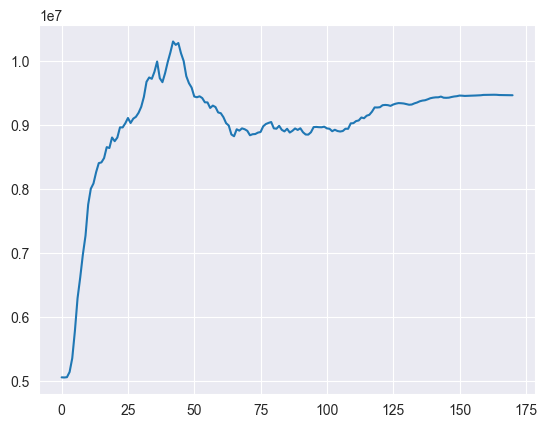

In [84]:
plt.plot(val_info['self_consumption'].sum(axis=1))